In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [9]:
df.shape

(500, 8)

In [10]:
df.columns = df.columns.str.strip()
X = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

In [11]:
from scipy import stats
numeric_feature=X.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", numeric_feature.shape[0])
print("Integer feature names: ", numeric_feature)

Total number of integer feature :  7
Integer feature names:  Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')


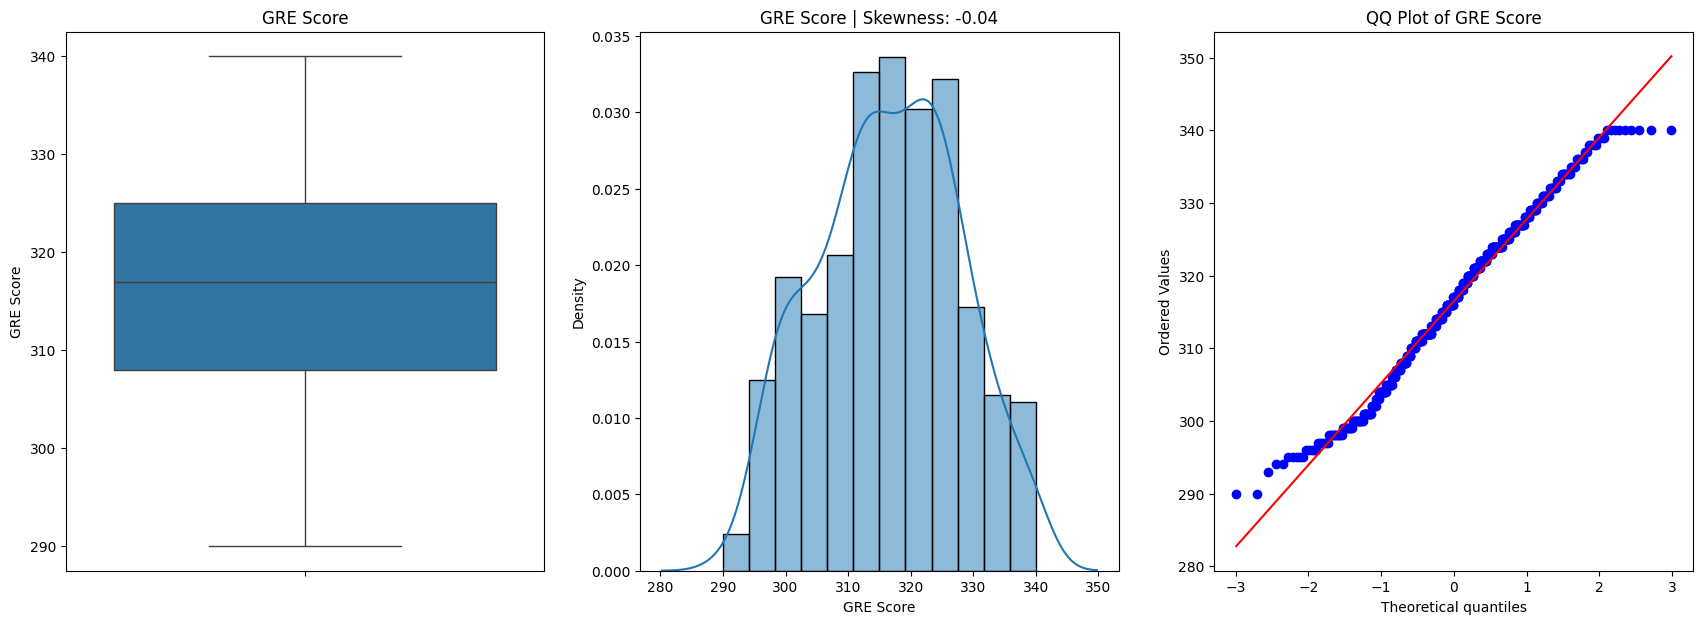

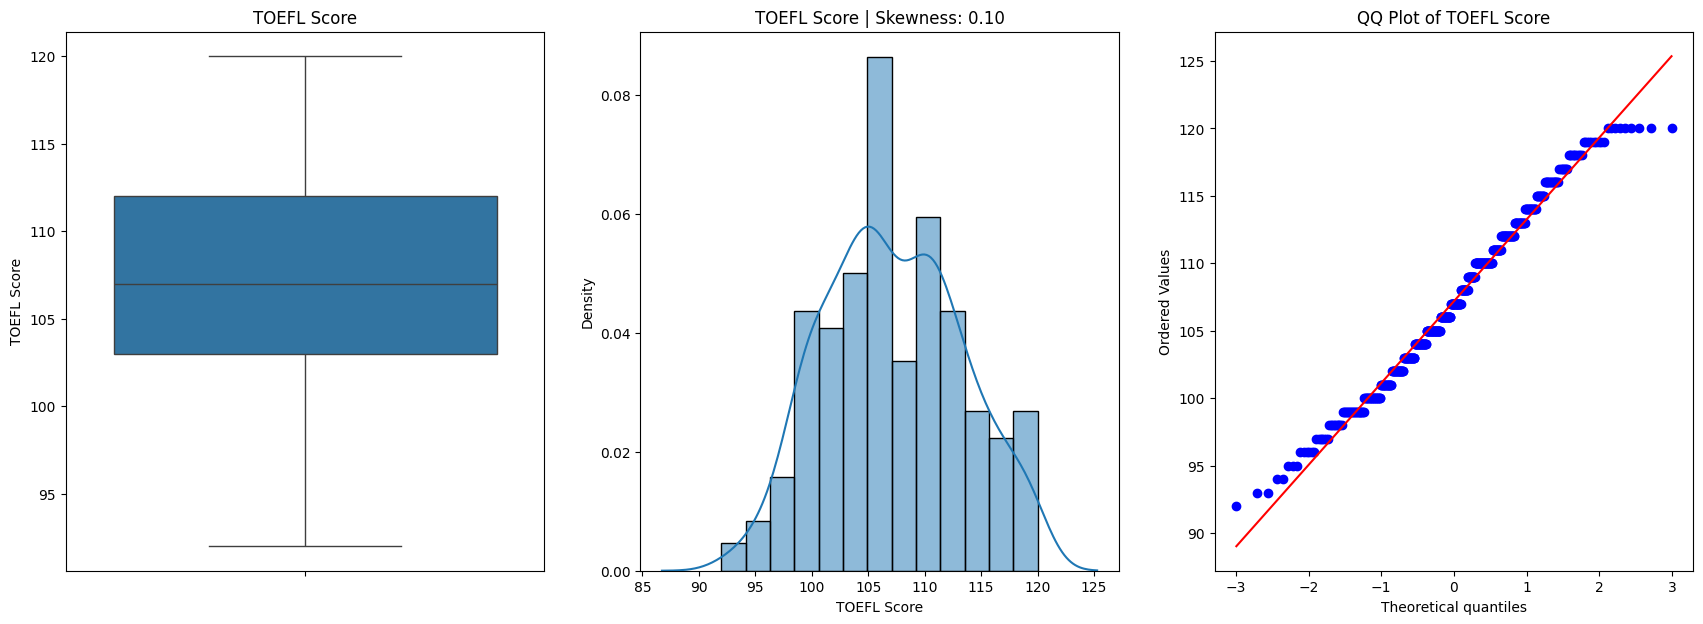

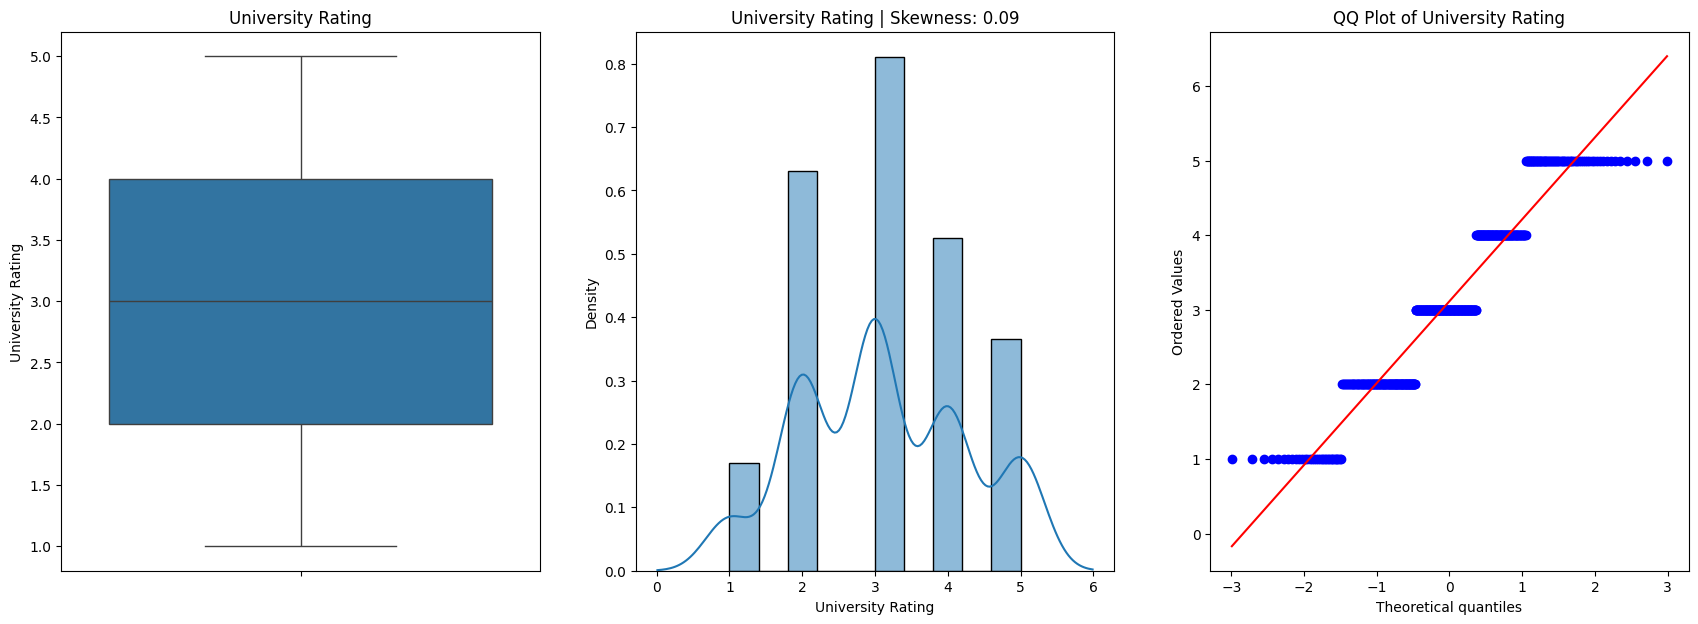

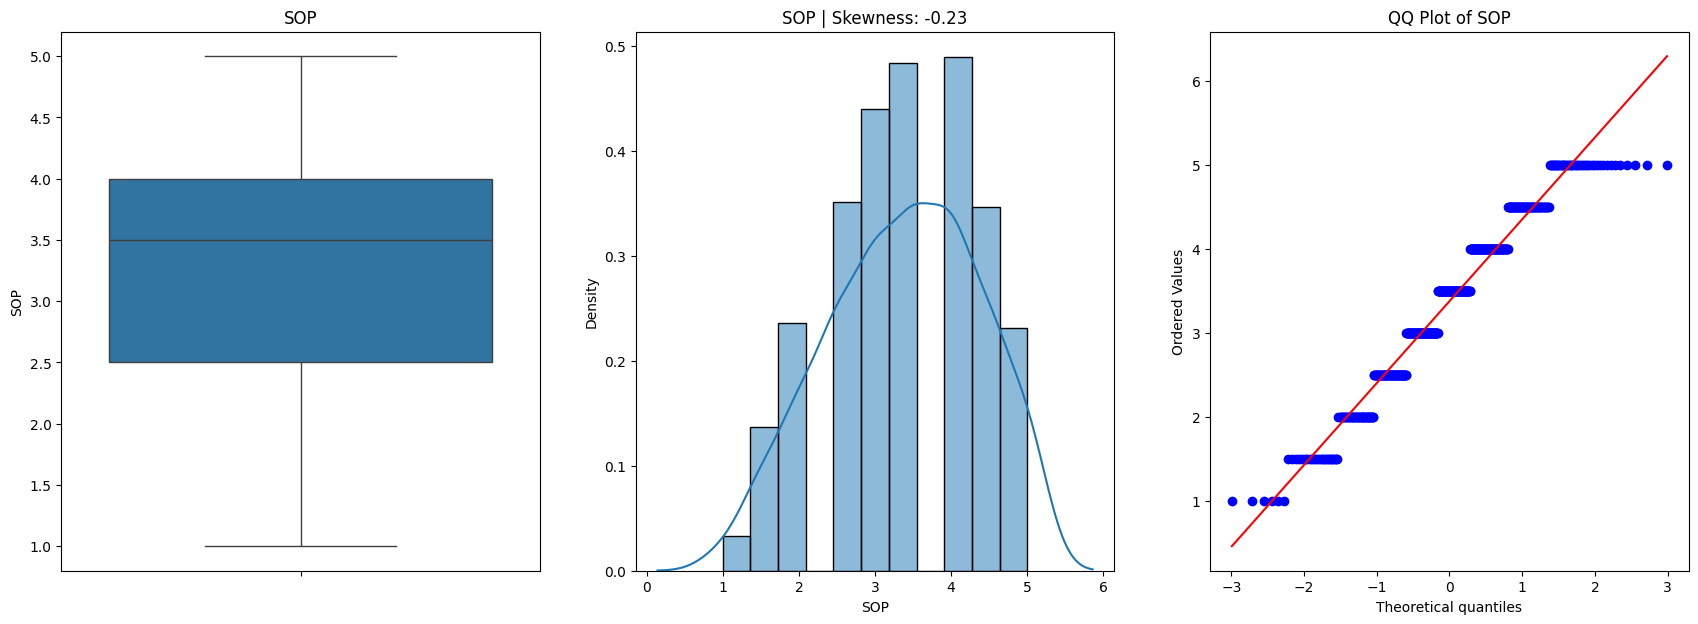

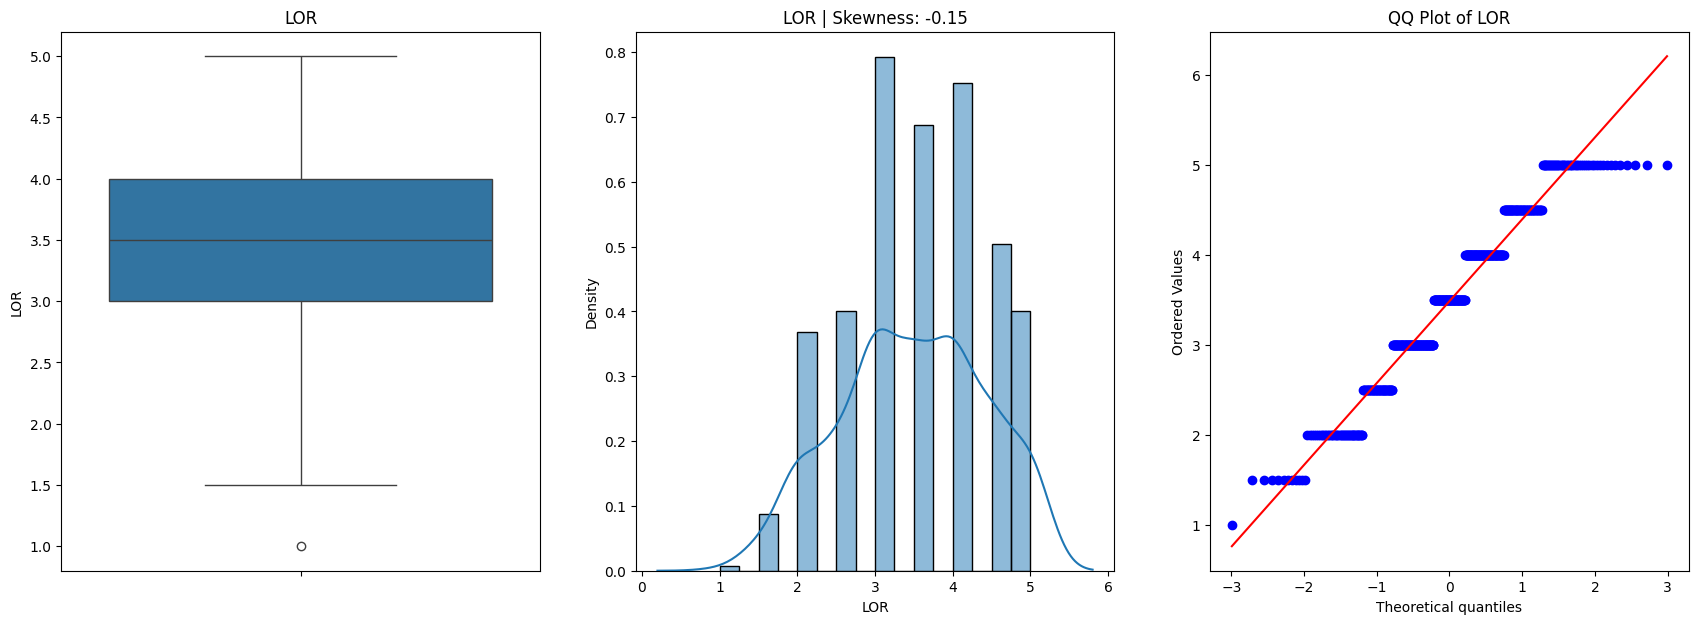

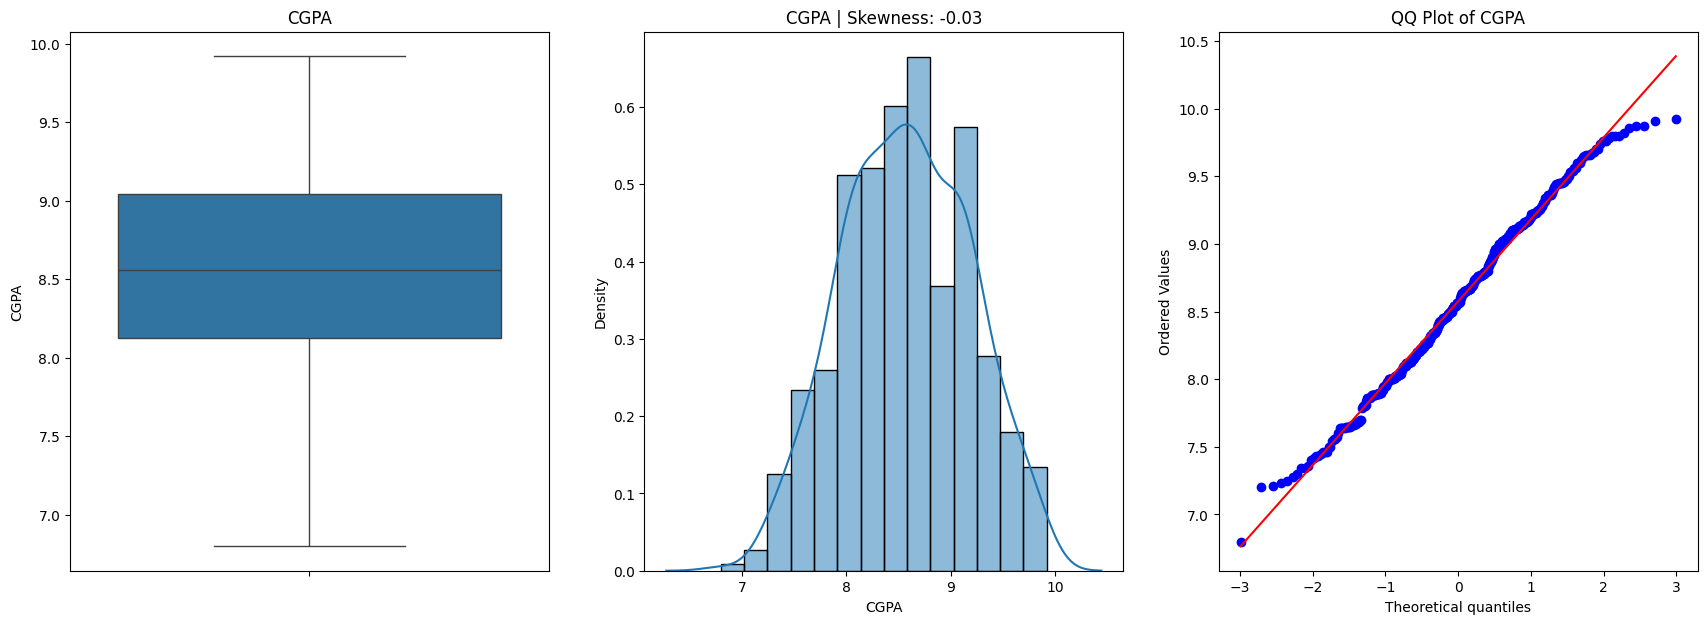

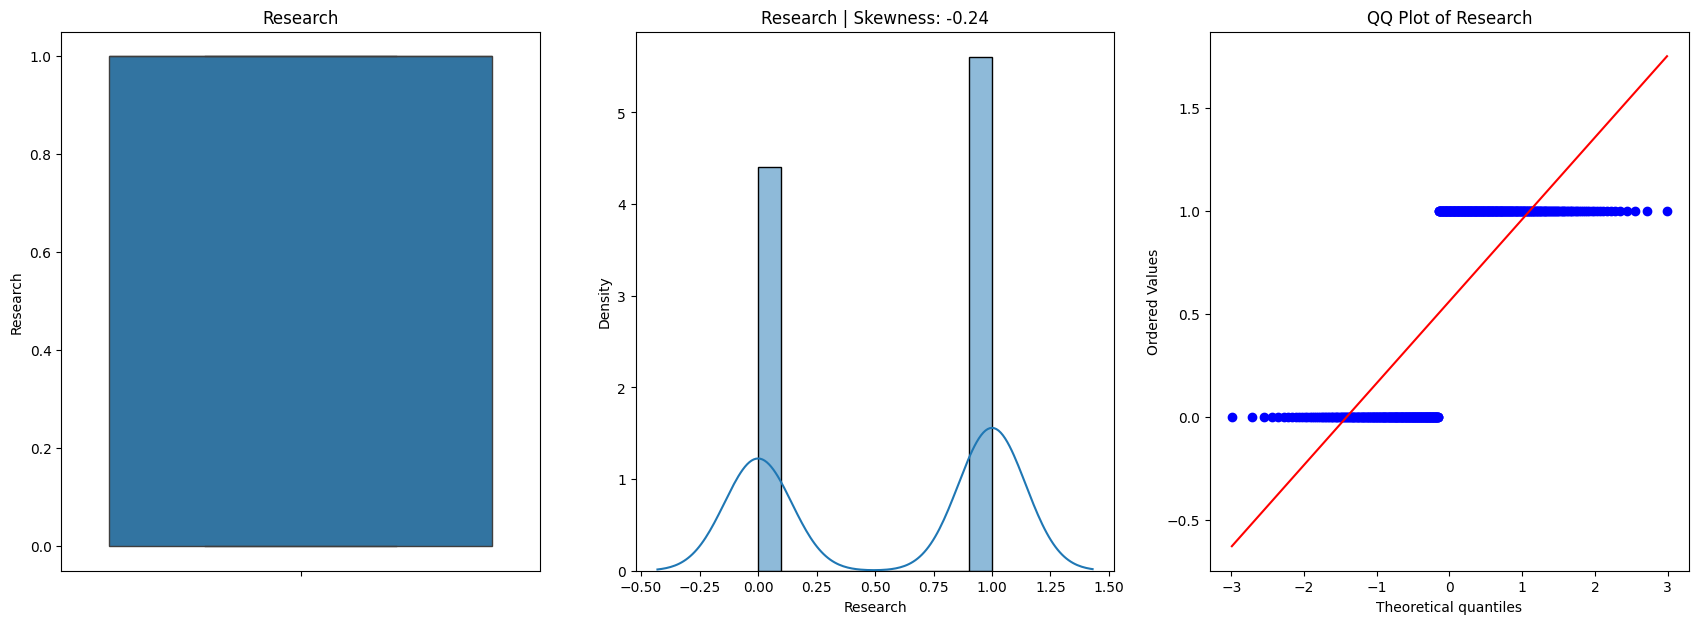

Columns with outliers: ['LOR']


In [12]:
outlier_cols = []

for col in numeric_feature:
    n = X[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(X[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(X[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(X[col], 25)
    q3 = np.percentile(X[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df[col] < lower_bound) | (X[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

   # print(f"Column: {col} | Skewness: {n}")

plt.show()

In [13]:
X_cap = df.copy()
for col in outlier_cols:
       percentile25 = X[col].quantile(0.25)
       percentile75 = X[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       X_cap[col] = np.where(
         X_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  X_cap[col] < lower_limit,
                  lower_limit,
                  X_cap[col]
                  )
       )

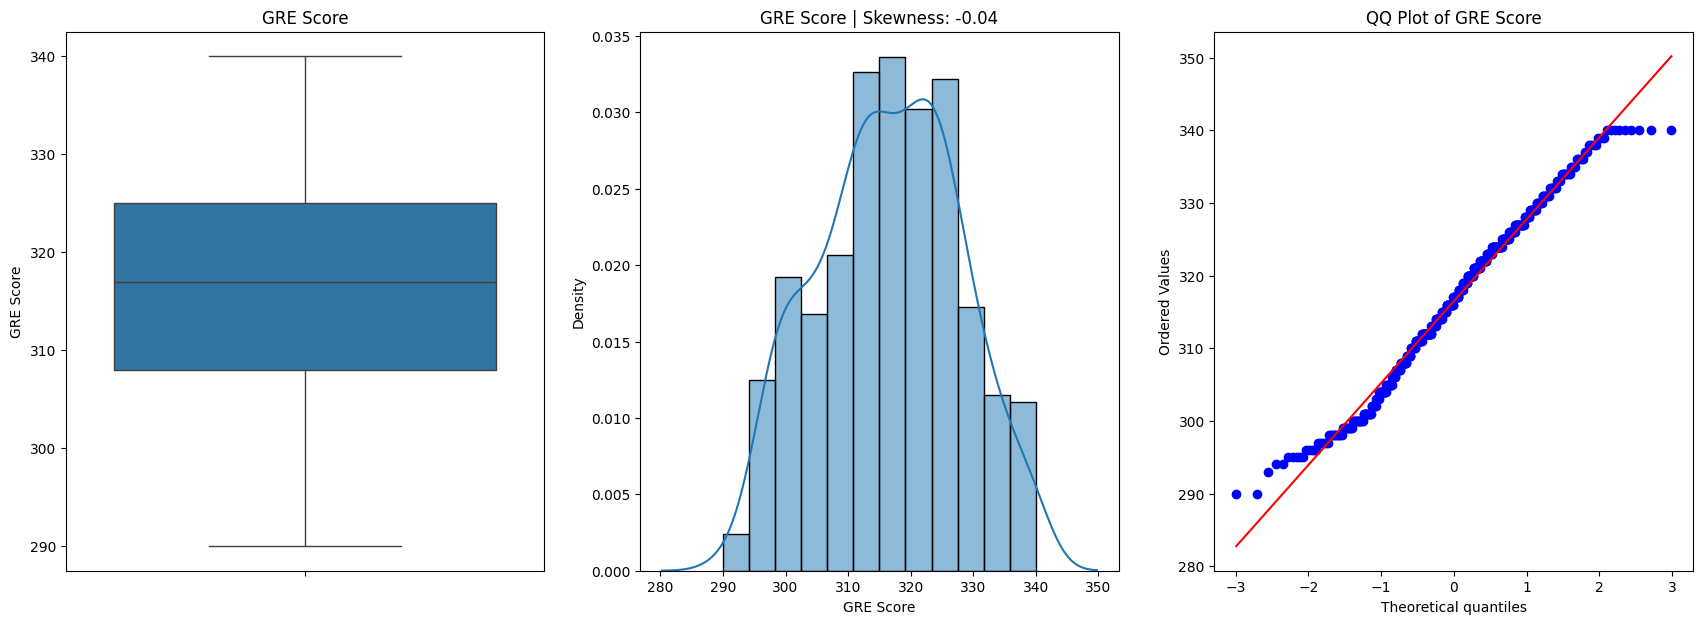

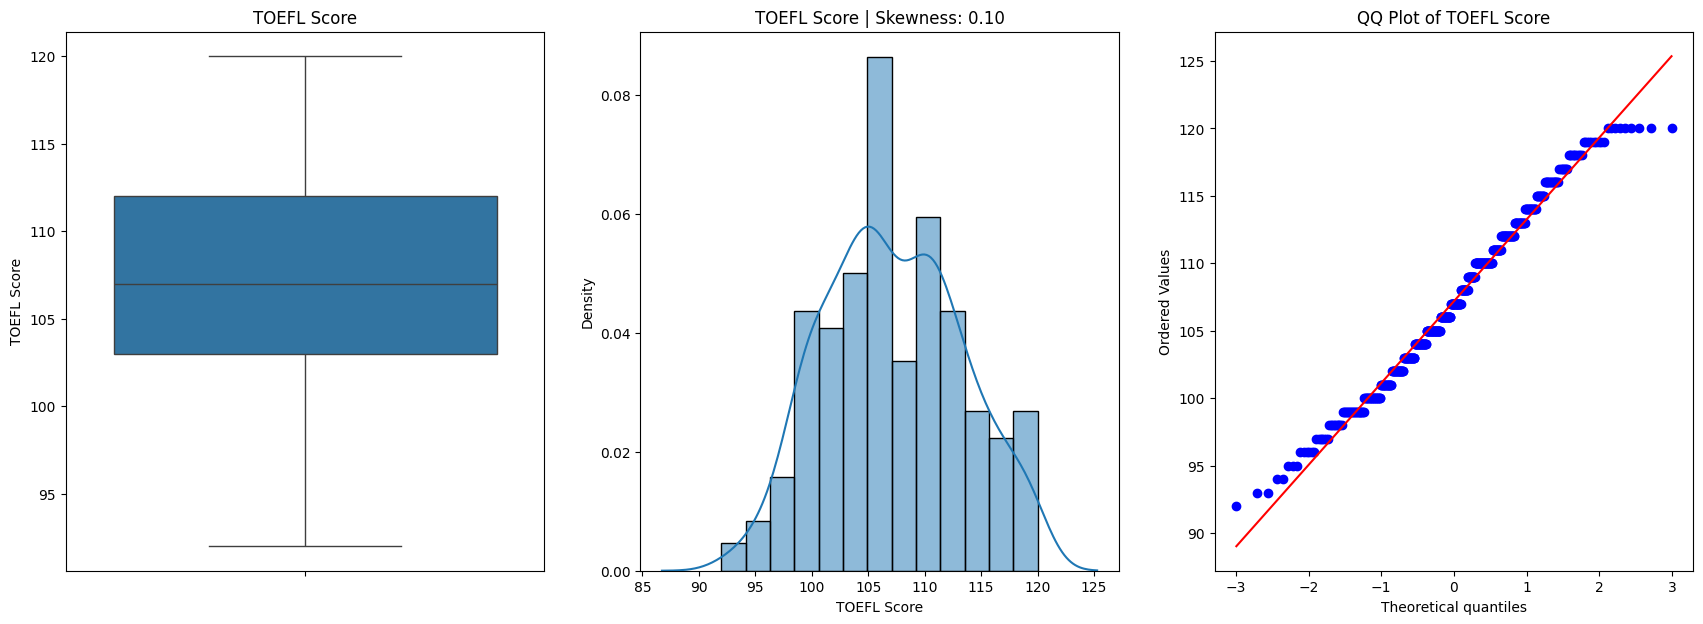

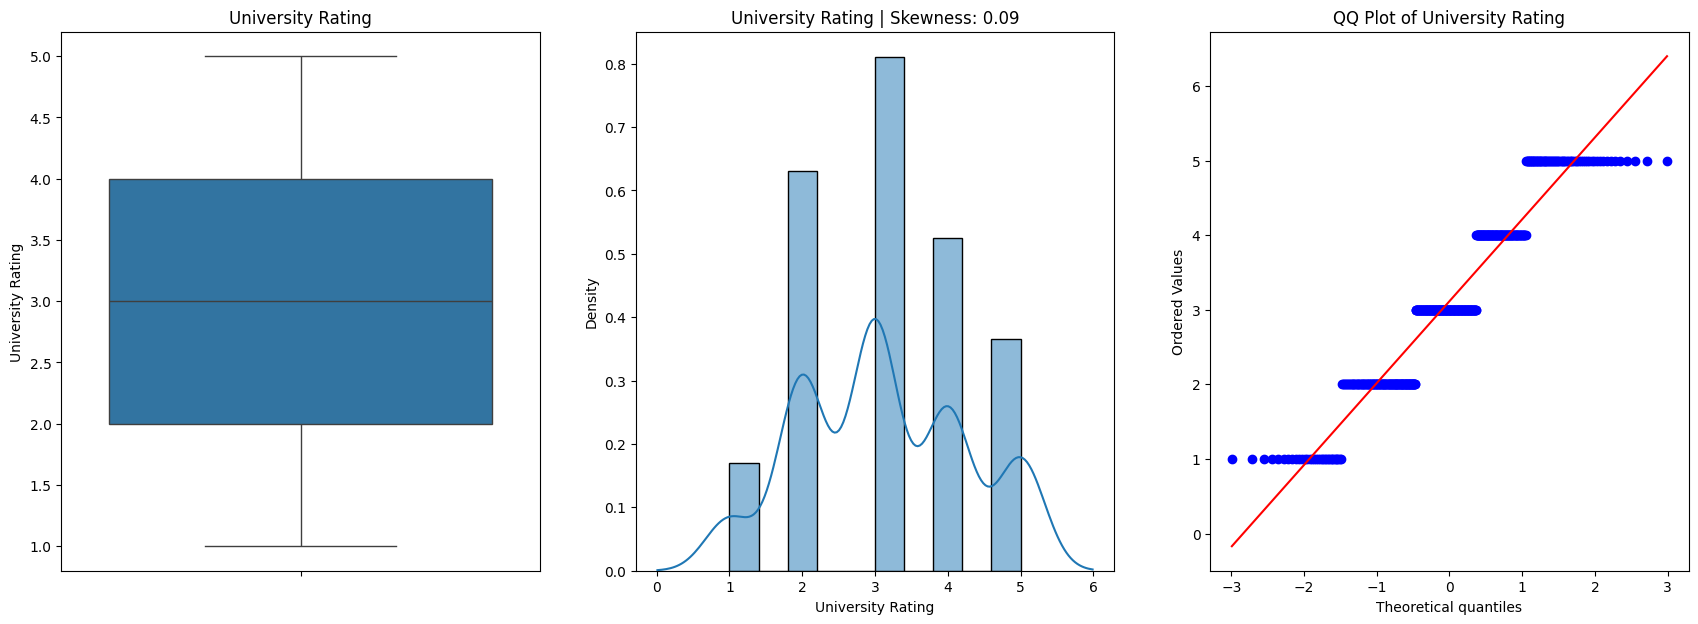

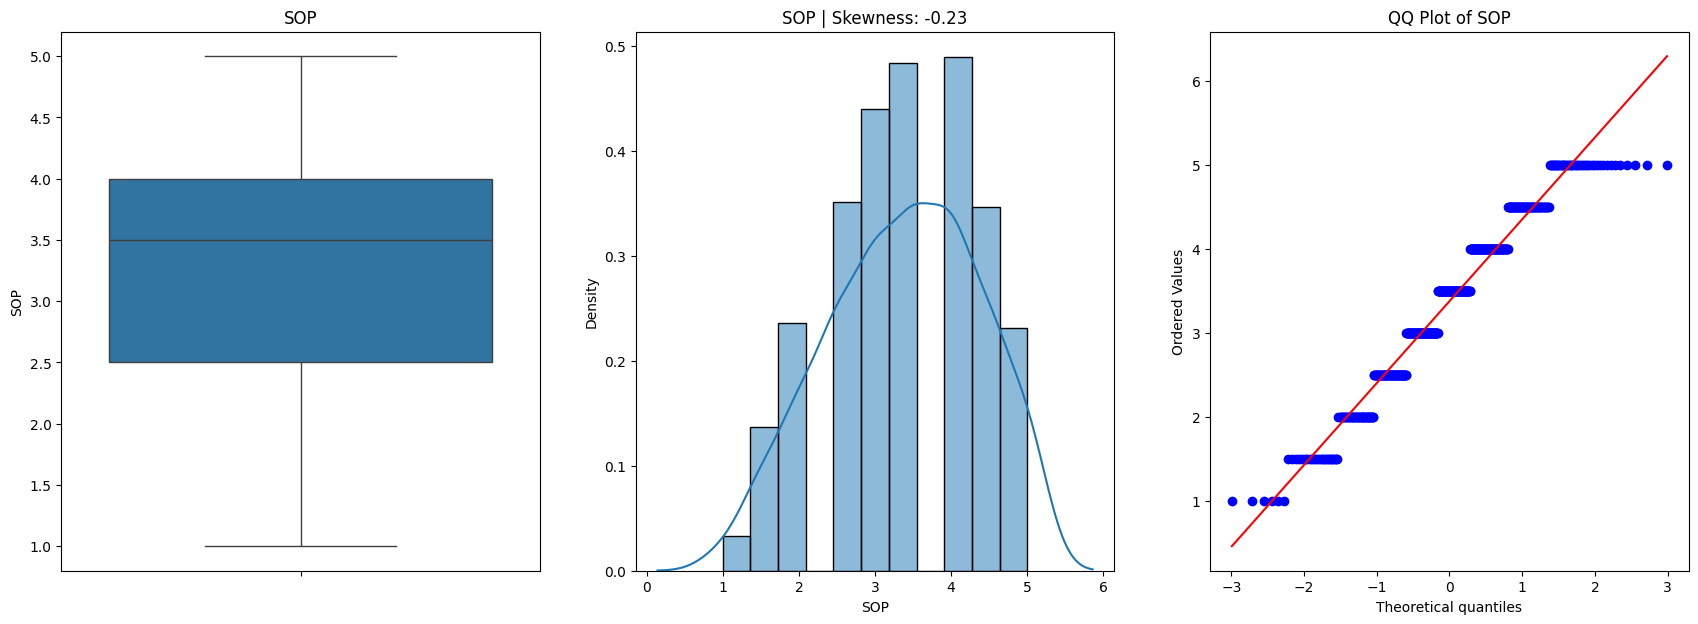

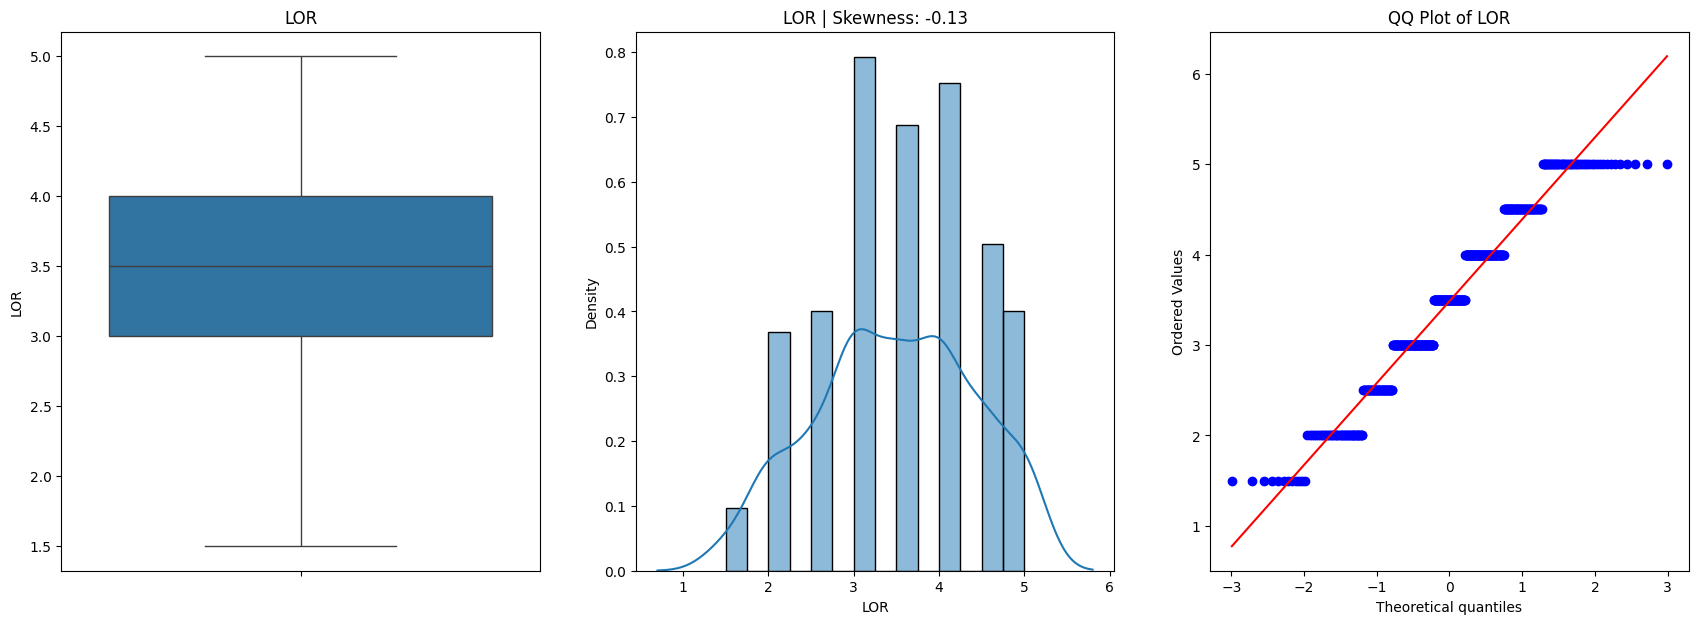

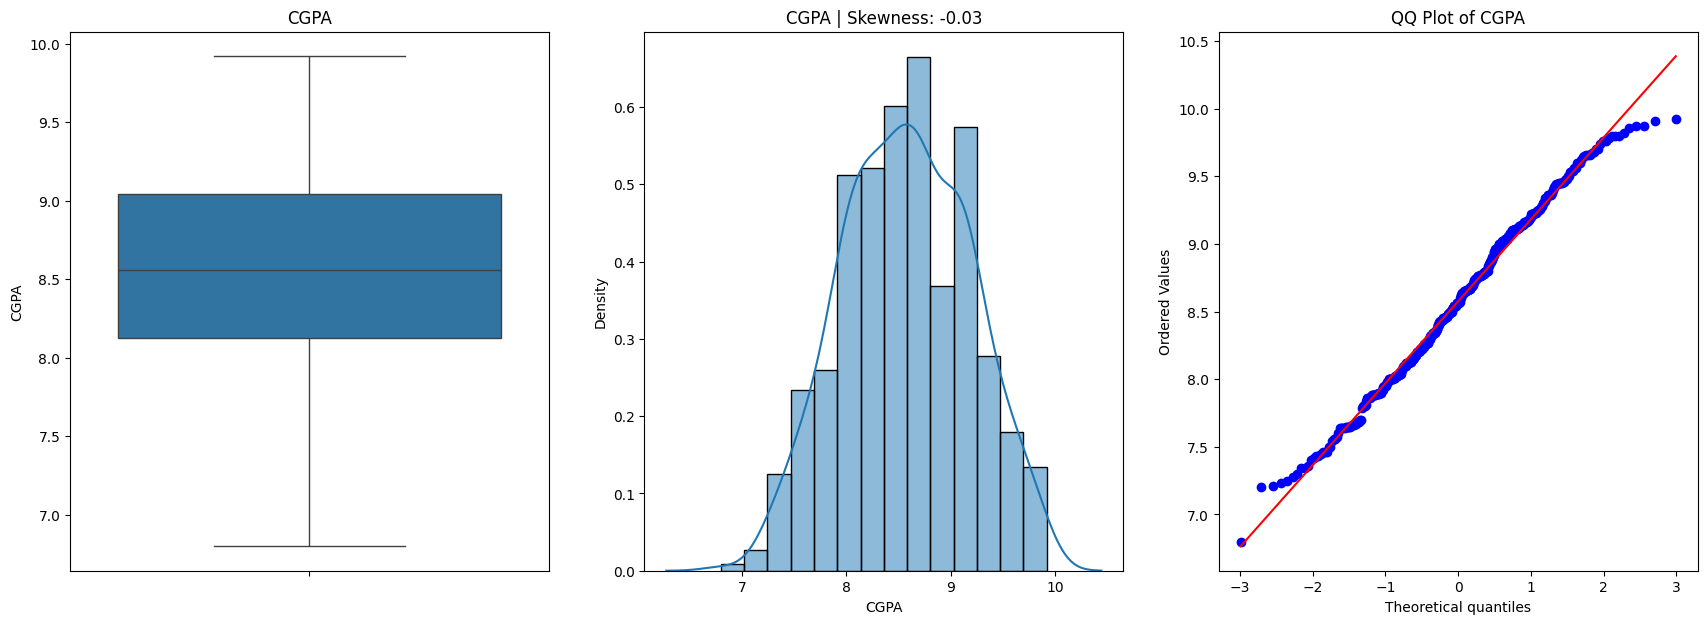

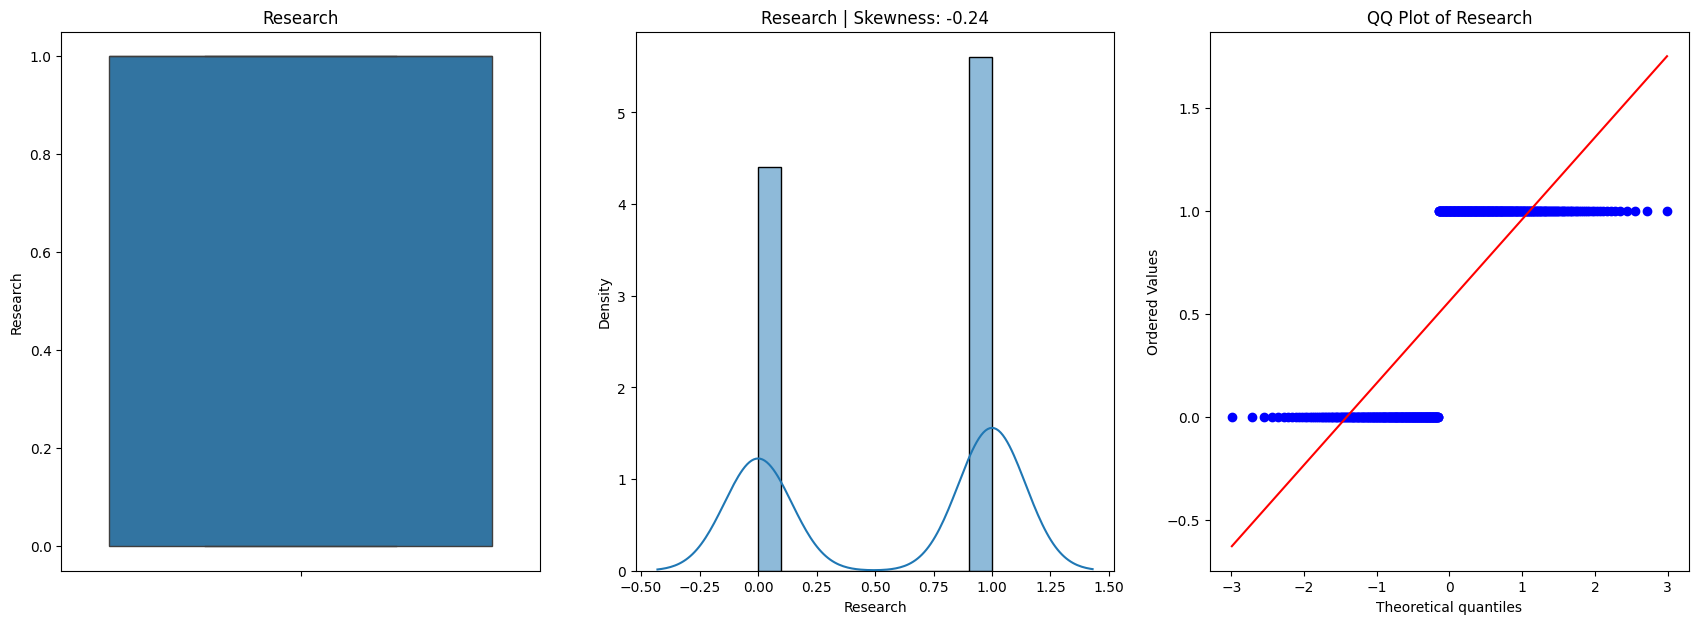

Columns with outliers: []


In [14]:
outlier_cols = []

for col in numeric_feature:
    n = X_cap[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(X_cap[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(X_cap[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(X_cap[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(X_cap[col], 25)
    q3 = np.percentile(X_cap[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (X_cap[col] < lower_bound) | (X_cap[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

   # print(f"Column: {col} | Skewness: {n}")

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((400, 7), (400,), (100, 7), (100,))

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.003704655398788405
R2 Score: 0.8188432567829631


In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_train)
y_pred2 = ridge.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

train_acc = r2_score(y_train, y_pred)
test_acc = r2_score(y_test, y_pred2)
print(f"Ridge R2 for training data: {train_acc}")
print(f"Ridge R2 for testing data: {test_acc}")

Ridge R2 for training data: 0.8210191381751499
Ridge R2 for testing data: 0.8179793486575073


In [21]:
from sklearn.model_selection import cross_val_score
# Use cross-validation for R2 
r2_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2')

# Print the mean R² score
print(f"Ridge Cross-Validation R2: {np.mean(r2_scores)}")

Ridge Cross-Validation R2: 0.8050169406530715


In [22]:
from sklearn.model_selection import cross_val_score
# Use cross-validation for R2 
r2_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')

# Print the mean R² score
print(f"Linear Regression Cross-Validation R2: {np.mean(r2_scores)}")

Linear Regression Cross-Validation R2: 0.8050068509073267
